In [2]:
import pandas as pd

In [1]:
#######################################################
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

plt.rcParams['axes.unicode_minus']=False # negative minus sign

import pickle
def save_data(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)
    print(f"Data saved to {filename}")
    
# 定义一个函数，用于加载文件中的数据
# 定义一个函数，用于加载文件中的数据
    # 打开文件，以二进制模式读取
def load_data(filename):
        # 使用pickle模块加载文件中的数据
    with open(filename, 'rb') as f:
    # 返回加载的数据
        data = pickle.load(f)
    return data


In [3]:
from pathlib import Path

# 获取当前脚本的路径
current_script_path = Path().resolve()

# 获取当前脚本所在的目录
current_dir = current_script_path.parent

# 获取上一级目录
parent_dir = current_dir.parent

df_want_hds_inrs=load_data(current_dir  / "HDs_INRs" / "data"/"df_want_l3_f1.pkl")
df_want_hds_irs=load_data(current_dir  / "HDs_IRs" / "data"/"df_want_l3_f1.pkl")
df_want_irs_inrs=load_data(current_dir  / "IRs_INRs" / "data"/"df_want_l3_f1.pkl")

In [4]:
# 假设第一列是索引
df_want_hds_inrs.set_index('celltype_L3', inplace=True)
df_want_hds_irs.set_index('celltype_L3', inplace=True)
df_want_irs_inrs.set_index('celltype_L3', inplace=True)
import pandas as pd
# 按索引对齐拼接
result = pd.concat([df_want_irs_inrs,df_want_hds_inrs, df_want_hds_irs], axis=1)
result.index = result.index.str.replace('_', ' ')

In [5]:
new_sort_shunxu=['CD4 Naive T-CCR7','CD4 Naive T-SOX4','CD4 Tcm-GPR183','CD4 Tcm-SOX4','CD4 Tcm-CXCR5','CD4 Tcm-IFIT3','CD4 Tfh like-CXCR5','CD4 Th-TNFRSF11A','CD4 Th1-GZMK','CD4 Th17-RORC','CD4 Th22-CCR10','CD4 Treg-FCRL3','CD4 Treg-FOXP3','CD8 Naive T-CCR7','CD8 Tcm-GPR183','CD8 Tcm-GZMK','CD8 Tem-GZMK','CD8 CTL-GZMK','CD8 CTL-GZMB','MAIT-SLC4A10','gdT2-GZMK','gdT2-GZMH','NKT-NCR1','NK bright-XCL1','Mature NK dim-FCGR3A','cMono-CD14','cMono-IFI44L','ncMono-FCGR3A','ncMono-IFI44L','cDC2-CD1C','Naive B-TCL1A','Switched Memory B-CD27','Switched Memory B-CD86']
result=result.loc[new_sort_shunxu]
result['celltype_L1']=['CD4']*13+['CD8']*10+['NK']*2+['my']*5+['zB']*3
df_sorted = result.sort_values(by=['celltype_L1', 'IRs_INRs'], ascending=[True, False])

In [6]:
df_sorted=df_sorted.drop(columns=['celltype_L1'])

In [7]:
result_loc=result.iloc[:,1:]

In [8]:
df_mean=result.groupby('celltype_L1').mean()

In [9]:
df_std=result.groupby('celltype_L1').std()

In [11]:
df_mean=df_mean.sort_values(by=df_mean.columns[0], ascending=False)
df_std=df_std.loc[df_mean.index,:]

In [12]:
df_mean

,IRs_INRs,HDs_INRs,HDs_IRs
celltype_L1,,,
NK,0.750496,0.906272,0.737036
CD8,0.743545,0.935842,0.817388
my,0.739922,0.920909,0.766154
zB,0.684029,0.904994,0.802662
CD4,0.641056,0.866736,0.719540


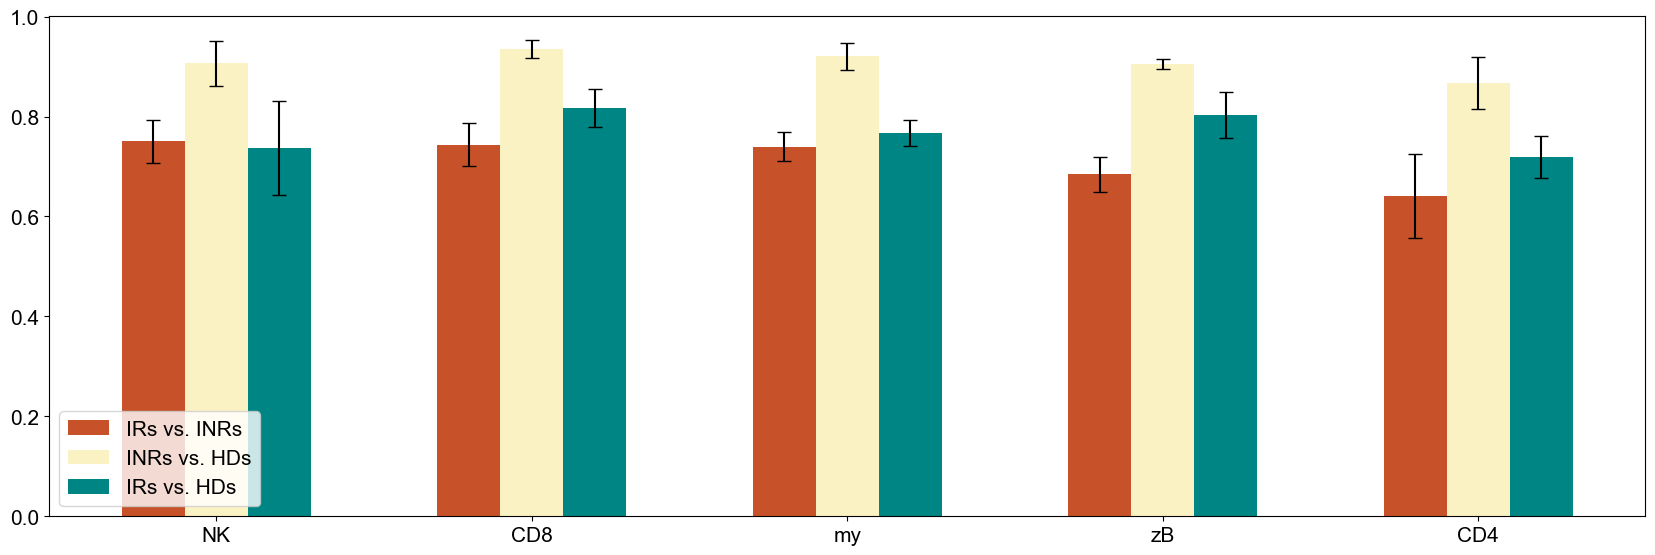

In [24]:
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams ['font.size']=15
# 示例数据
categories = df_mean.index.tolist()  # 类别名称
group1_values = df_mean['IRs_INRs'].tolist()  # 类别名称
group2_values = df_mean['HDs_INRs'].tolist()  # 类别名称
group3_values = df_mean['HDs_IRs'].tolist()  # 类别名称
group1_errors = df_std['IRs_INRs'].tolist()  

group2_errors = df_std['HDs_INRs'].tolist()
group3_errors = df_std['HDs_IRs'].tolist()
# 设置柱状图的位置
fig, ax = plt.subplots(figsize=(20.6, 6.5))
x = np.arange(len(categories))  # 类别的位置
width = 0.2  # 柱子的宽度
rects1 = ax.bar(x - width, group1_values, width, yerr=group1_errors, capsize=5, label='IRs vs. INRs', color='#c7522a')
rects2 = ax.bar(x, group2_values, width, yerr=group2_errors, capsize=5, label='INRs vs. HDs', color='#fbf2c4')
rects3 = ax.bar(x + width, group3_values, width, yerr=group3_errors, capsize=5, label='IRs vs. HDs', color='#008585')
# 绘制分组柱状图

# rects1 = ax.bar(x - width, group1_values, width, label='IRs vs. INRs', color='skyblue')
# rects2 = ax.bar(x, group2_values, width, label='INRs vs. HDs', color='orange')
# rects3 = ax.bar(x + width, group3_values, width, label='IRs vs. HDs', color='green')



ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
plt.savefig("Figure6-c.pdf", dpi=300, bbox_inches='tight', pad_inches=0)
# 显示图表
plt.show()